In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
# загрузка тренировочных и тестовых данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# конвертация чисел из uint8 в float32
x_train = train_images.astype('float32')
x_test = test_images.astype('float32')

In [6]:
# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255

In [7]:
# трансформация лейблов в one-hot encoding
y_train = to_categorical(train_labels, 10) 
y_test = to_categorical(test_labels, 10) 

In [8]:
# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models, layers
import tensorflow.keras as keras

In [10]:
# инициализация  модели
input= layers.Input(shape=(28,28,1))

In [11]:
# первый сверточный слой
x1 = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input)
# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x1)
# третий сверточный слой
x3 = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)
# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)
# пятый  слой
x5 = layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)
# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)
# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)

In [12]:
# Соберем полную модель сети от входа к выходу 
model = Model(inputs = input, outputs = out_x) 

In [13]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)             

In [15]:
# Обучаем модель
hist = model.fit(x=x_train,y=y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.9128 - accuracy: 0.6891 - val_loss: 0.6865 - val_accuracy: 0.7375
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5910 - accuracy: 0.7822 - val_loss: 0.5837 - val_accuracy: 0.7825
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.8096 - val_loss: 0.5374 - val_accuracy: 0.8060
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4914 - accuracy: 0.8253 - val_loss: 0.5082 - val_accuracy: 0.8175
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4656 - accuracy: 0.8353 - val_loss: 0.4885 - val_accuracy: 0.8267


In [16]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.8267
Test loss 0.4885, accuracy 82.67%


In [17]:
y_pred=model.predict(x_test)

In [24]:
# Функция для отображения результата
def showing_the_resalt(nun_resalt, y_pred):
  y_pred = y_pred
  plt.plot(y_pred[nun_resalt][:])
  plt.show()
  print(y_pred[nun_resalt][:])
  plt.imshow(x_test[nun_resalt][:,:,0])
  plt.show()
  print(f'{class_names[test_labels[nun_resalt]]} опознано как {class_names[np.argmax(y_pred[nun_resalt])]} с точностью {y_pred[nun_resalt].max()}')

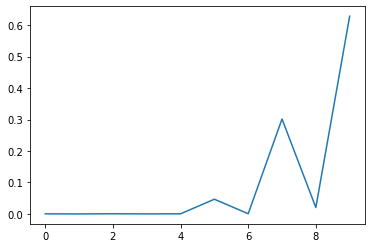

[3.5270429e-04 1.8251277e-04 6.4190151e-04 2.8139216e-04 5.3571863e-04
 4.6898730e-02 7.6343067e-04 3.0168828e-01 2.0507250e-02 6.2814814e-01]


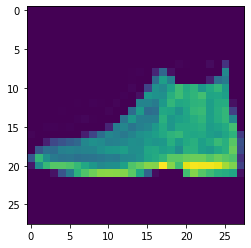

Ankle boot опознано как Ankle boot с точностью 0.6281481385231018


In [19]:
showing_the_resalt(0, y_pred)

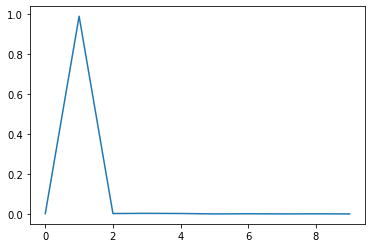

[1.6392281e-03 9.8951679e-01 1.9578049e-03 2.9058519e-03 2.1607468e-03
 9.8488650e-05 8.3623111e-04 1.3693422e-04 6.1609910e-04 1.3166989e-04]


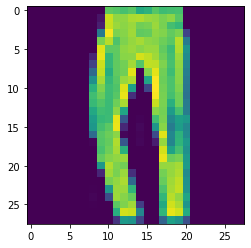

Trouser опознано как Trouser с точностью 0.9895167946815491


In [20]:
showing_the_resalt(5, y_pred)

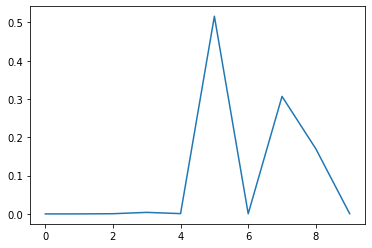

[1.3428181e-04 1.9780658e-04 6.5539690e-04 4.1210200e-03 8.9543959e-04
 5.1591933e-01 5.7052972e-04 3.0674690e-01 1.6999458e-01 7.6471781e-04]


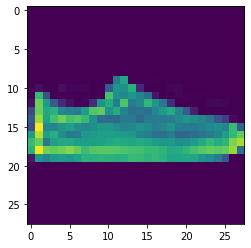

Sneaker опознано как Sandal с точностью 0.5159193277359009


In [21]:
showing_the_resalt(12, y_pred)

In [22]:
# Увеличим количество ядер

# первый сверточный слой
x1 = layers.Conv2D(12, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input)
# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x1)
# третий сверточный слой
x3 = layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)
# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)
# пятый  слой
x5 = layers.Conv2D(240, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)
# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)
# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)
# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input, outputs = out_x)
# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 12)        312       
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 32)        9632      
_________________________________________________________________
average_pooling2d_3 (Average (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 240)         192240    
_________________________________________________________________
flatten_1 (Flatten)          (None, 11760)            

In [23]:
# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=1)
test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8918 - accuracy: 0.6837 - val_loss: 0.6649 - val_accuracy: 0.7577
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5897 - accuracy: 0.7815 - val_loss: 0.5694 - val_accuracy: 0.7897
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5227 - accuracy: 0.8104 - val_loss: 0.5353 - val_accuracy: 0.8076
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4825 - accuracy: 0.8275 - val_loss: 0.4944 - val_accuracy: 0.8252
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.8287
Test loss 0.4771, accuracy 82.87%


In [25]:
# Увеличение количества ядер в 2 раза не привело к существенному улучшению модели
y_pred1 = model1.predict(x_test)

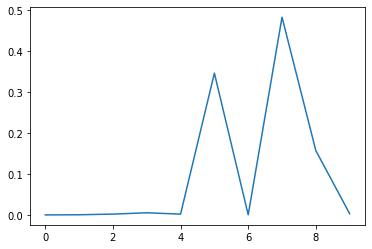

[1.2516112e-04 5.1087089e-04 2.1232450e-03 5.3562378e-03 2.0328523e-03
 3.4634158e-01 3.9800003e-04 4.8280564e-01 1.5713677e-01 3.1696125e-03]


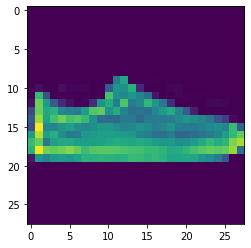

Sneaker опознано как Sneaker с точностью 0.48280563950538635


In [26]:
showing_the_resalt(12, y_pred1)

In [31]:
# Увеличим количество слоев

# первый сверточный слой
x1 = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input)
# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x1)
# третий сверточный слой
x3 = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)
# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)
# пятый  слой
x5 = layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4)
# шестой слой
x6 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x5)
# седьмой слой
x7 = layers.Conv2D(480, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x6)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x8 = layers.Flatten()(x7)
# девятый полносвязный слой
x9 = layers.Dense(84, activation='tanh')(x8)
# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x9)
# Соберем полную модель сети от входа к выходу 
model2 = Model(inputs = input, outputs = out_x)
# компилияция модели
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
model2.summary()

ValueError: ignored